### Model OFAutoRegressive

In [1]:
import sys
sys.path.append('../pyorderedfuzzy')

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ofnumber as ofn
import ofmodels as ofm
import ofrandom as ofr

In [3]:
#mu = ofn.OFNumber.init_from_scalar(0.0, dim=101) 
mu = ofn.OFNumber.init_trapezoid_x0x1(-0.5, 0, 0.5, 0, dim=101)
sig2 = ofn.OFNumber.init_from_scalar(0.0, dim=101)
s2 = 0.1
p = 0.5

In [4]:
a0 = ofr.ofnormal(mu, sig2, s2, p)
a1 = ofr.ofnormal(mu, sig2, s2, p)
a2 = ofr.ofnormal(mu, sig2, s2, p)
x_m1 = ofr.ofnormal(mu, sig2, s2, p)
x_m2 = ofr.ofnormal(mu, sig2, s2, p)
ofs = ofm.OFSeries([a0,a1,a2,x_m2, x_m1])

<IPython.core.display.Javascript object>


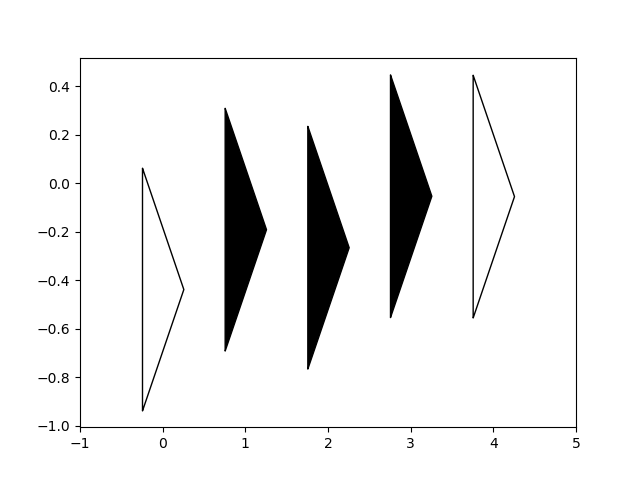

In [5]:
fig, ax = plt.subplots()
ofs.plot_ofseries(ax)
plt.show()

In [6]:
ar2_model = ofm.OFAutoRegressive(order=2)

In [9]:
ar2 = ar2_model.predict(1000, coefs=[a0,a1,a2], initials=[x_m2, x_m1])

<IPython.core.display.Javascript object>


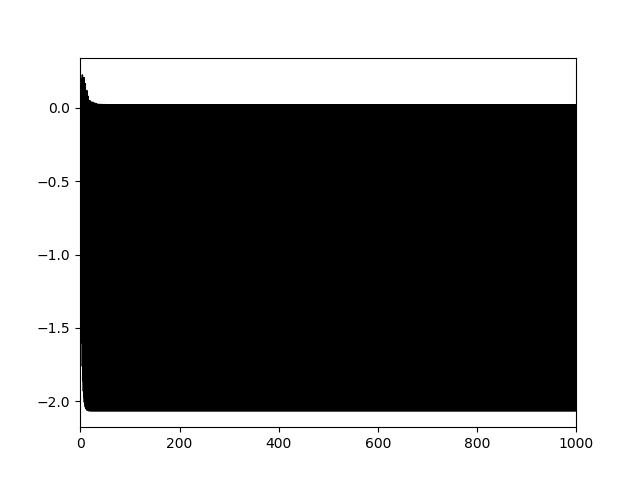

In [10]:
fig, ax = plt.subplots()
ar2.plot_ofseries(ax)
plt.show()

In [11]:
#%%timeit
ar2_model.fit(ar2)

<IPython.core.display.Javascript object>


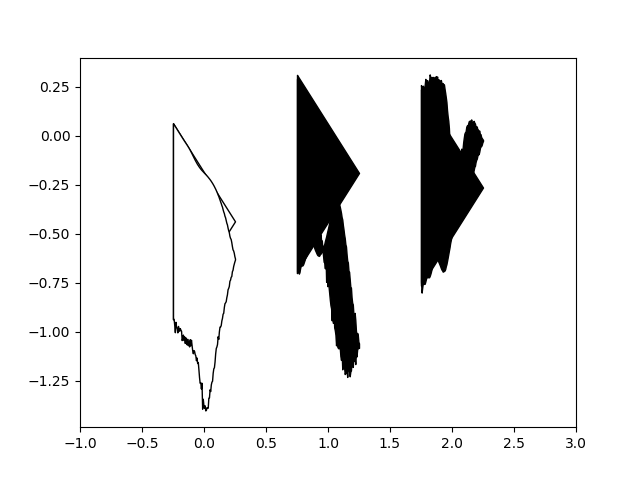

In [12]:
c_true = ofm.OFSeries([a0,a1,a2])
fig, ax = plt.subplots()
c_true.plot_ofseries(ax)
ar2_model.coefs.plot_ofseries(ax)
plt.show()

In [13]:
ar2_sim = ar2 = ar2_model.predict(1000, coefs=[a0,a1,a2], initials=[x_m2, x_m1], error=True)

<IPython.core.display.Javascript object>


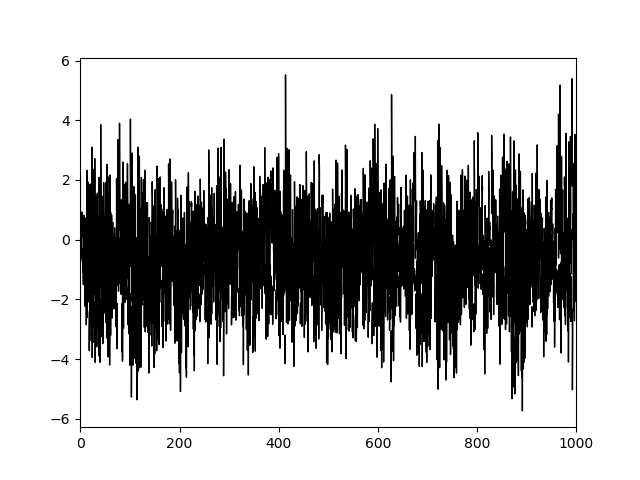

In [14]:
fig, ax = plt.subplots()
ar2_sim.plot_ofseries(ax)
plt.show()

In [15]:
ar2_model.fit(ar2_sim)

<IPython.core.display.Javascript object>


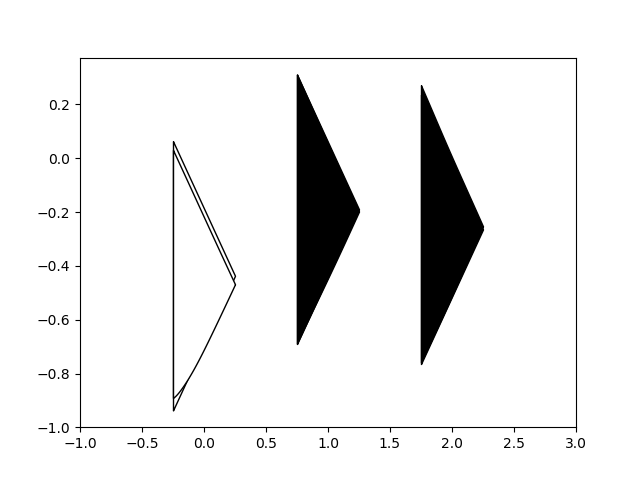

In [16]:
c_true = ofm.OFSeries([a0,a1,a2])
fig, ax = plt.subplots()
c_true.plot_ofseries(ax)
ar2_model.coefs.plot_ofseries(ax)
plt.show()

<IPython.core.display.Javascript object>


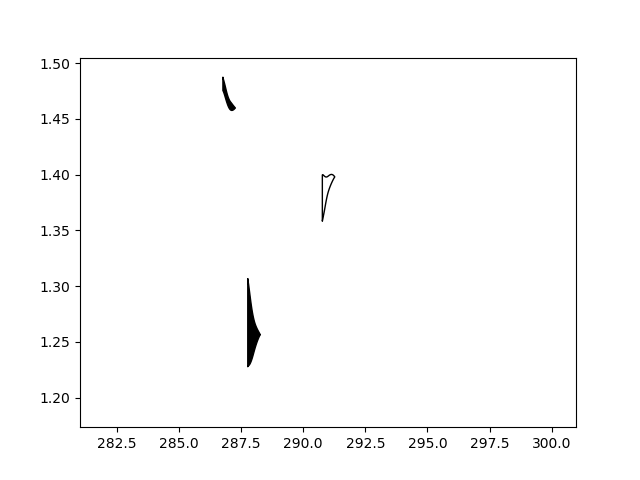

In [17]:
fig, ax = plt.subplots()
ar2_model.residuals.plot_ofseries(ax)
plt.show()

In [18]:
ar2_model.residuals.mean_crisp()

1.2614087856118192e-06

In [20]:
ar2_model.residuals.mean_fuzzy()

([-1.36255842e-04 -8.84480769e-05  1.43442741e-05 -5.00919504e-05
  3.79000617e-05 -2.41404143e-05  1.00133782e-04  7.96834613e-05
  6.30414666e-05  6.15818342e-05  5.31541867e-05  4.07060998e-05
  2.88525305e-05  1.66240302e-05  4.82011850e-06 -7.10269652e-06
 -1.75553236e-05 -2.64752960e-05 -3.34924427e-05 -3.94053637e-05
 -4.46729624e-05 -4.98295877e-05 -4.85063414e-05 -4.90259705e-05
 -4.83464988e-05 -4.54151579e-05 -4.23014791e-05 -3.81967029e-05
 -3.23739613e-05 -2.61253641e-05 -2.03210503e-05 -1.37086518e-05
 -7.54878804e-06 -9.61531330e-07  5.20262740e-06  1.13109541e-05
  1.72220099e-05  2.30986023e-05  2.88880685e-05  3.31264934e-05
  3.77308083e-05  4.15393987e-05  4.41234623e-05  4.57286415e-05
  4.44229152e-05  4.28265666e-05  3.92031581e-05  3.42001600e-05
  2.52629241e-05  1.71948030e-05  1.12038206e-05  5.51436663e-07
 -4.45738702e-06 -1.39059208e-05 -2.15934806e-05 -2.30872890e-05
 -2.47224691e-05 -2.66551035e-05 -2.51516800e-05 -2.20985797e-05
 -1.90653169e-05 -1.4499

In [19]:
ar2_model.residuals.order_probability()

0.4909819639278557

In [21]:
ar2_model.residuals.var_crisp()

0.9725336163818002

<IPython.core.display.Javascript object>


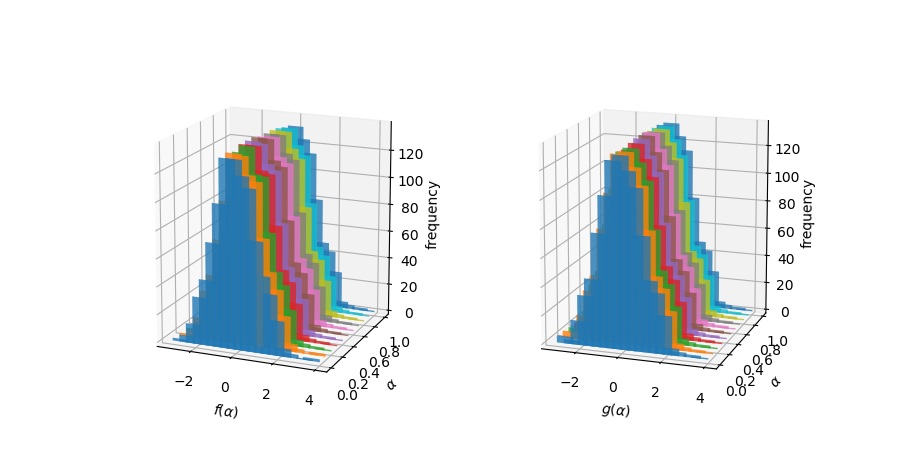

In [22]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
axf = fig.add_subplot(121, projection='3d')
axg = fig.add_subplot(122, projection='3d')
ar2_model.residuals.plot_3d_histogram(axf, axg)
plt.show()